## Importing the libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import datetime as dt 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

## Importing the Dataset

In [ ]:
ds = pd.read_csv("bigdata.csv")

In [ ]:
ds.head()

Occupation  Age Gender  Weight  Vigorous Activity days/week  \
0    Teacher   31      F      68                            2   
1    Teacher   33      F      62                            3   
2    Teacher   46      M      81                            2   
3    Teacher   42      F      63                            2   
4    Teacher   28      M      70                            3   

   Vigorous Activity minutes/day  Vigorous Activity minutes/week  \
0                             30                              60   
1                             30                              90   
2                             45                              90   
3                             30                              60   
4                             60                             180   

   Sitting at work days/week  Sitting at work minutes/week  \
0                          5                          1440   
1                          5                          1440   
2                          5                          1680   
3                          5                          1440   
4                          5                          1440   

   Standing at work days/week  ...  Total Work MET  Liesure Time  \
0                           5  ...            3000            60   
1                           5  ...            3075           120   
2                           5  ...            2400           180   
3                           5  ...            2950           120   
4                           5  ...            3450           180   

   Liersure/week  Sleep   Sleep/week  Total Rest MET  Total MET  \
0            300     480        2400            2190       5190   
1            600     420        2100            2220       5295   
2            900     390        1950            2370       4770   
3            600     390        1950            2100       5050   
4            900     390        1950            2370       5820   

   Total MET Hours/week  MET  Total Calories burned  
0             86.500000    5                 2448.0  
1             88.250000    5                 2232.0  
2             79.500000    5                 2916.0  
3             84.166667    5                 2268.0  
4             97.000000    5                 2520.0  

[5 rows x 35 columns]

In [ ]:
ds.shape

(90, 35)

In [ ]:
pd.unique(ds.Occupation)

array(['Teacher', 'IT', 'Shop Floor Worker'], dtype=object)

## Checking Missing Values

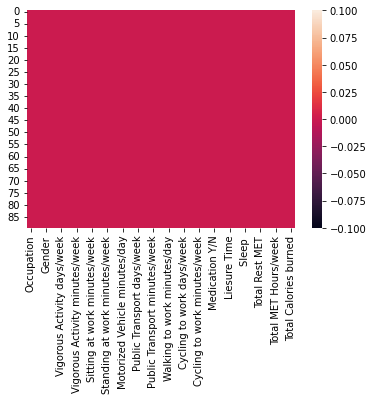

In [ ]:
sns.heatmap(ds.isnull())

In [ ]:
ds.isnull().sum()

Occupation                         0
Age                                0
Gender                             0
Weight                             0
Vigorous Activity days/week        0
Vigorous Activity minutes/day      0
Vigorous Activity minutes/week     0
Sitting at work days/week          0
Sitting at work minutes/week       0
Standing at work days/week         0
Standing at work minutes/week      0
Motorized Vehicle days/week        0
Motorized Vehicle minutes/day      0
Motorized Vehicle minutes /week    0
Public Transport days/week         0
Public Transport minutes/day       0
Public Transport minutes/week      0
Walking to work days/week          0
Walking to work minutes/day        0
Walking to work minutes/week       0
Cycling to work days/week          0
Cycling to work minutes/day        0
Cycling to work minutes/week       0
Transport                          0
Medication Y/N                     0
Total Work MET                     0
Liesure Time                       0
L

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Occupation                       90 non-null     object 
 1   Age                              90 non-null     int64  
 2   Gender                           90 non-null     object 
 3   Weight                           90 non-null     int64  
 4   Vigorous Activity days/week      90 non-null     int64  
 5   Vigorous Activity minutes/day    90 non-null     int64  
 6   Vigorous Activity minutes/week   90 non-null     int64  
 7   Sitting at work days/week        90 non-null     int64  
 8   Sitting at work minutes/week     90 non-null     int64  
 9   Standing at work days/week       90 non-null     int64  
 10  Standing at work minutes/week    90 non-null     int64  
 11  Motorized Vehicle days/week      90 non-null     int64  
 12  Motorized Vehicle minute

##Graph Analysis

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(ds,size=10);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


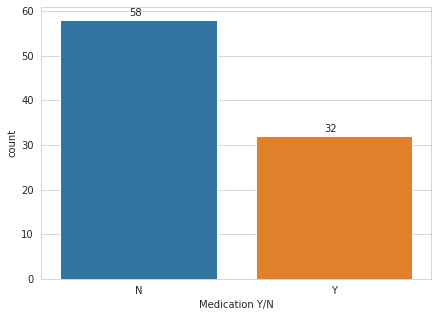

In [ ]:
plt.figure(figsize=(7,5))
ab = sns.countplot(ds['Medication Y/N'],data=ds)
for p in ab.patches:
        ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

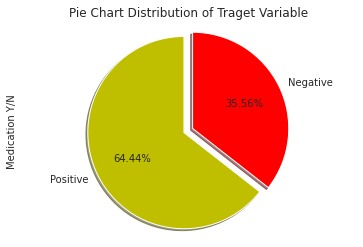

In [ ]:
ds["Medication Y/N"].value_counts().plot.pie( explode = (.1, 0), 
                                    autopct = "%1.2f%%", 
                                    colors = ['y' , 'r'],
                                    labels = ["Positive" , "Negative"],
                                    startangle = 90,
                                    shadow =True)
plt.axis('equal')
plt.title('Pie Chart Distribution of Traget Variable')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


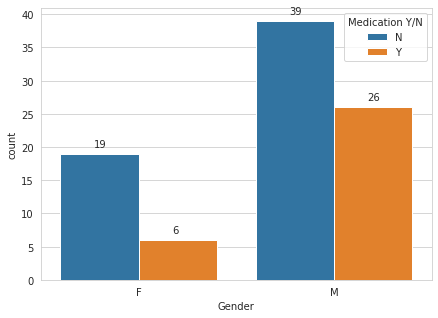

In [ ]:
plt.figure(figsize=(7,5))
ab = sns.countplot(ds['Gender'],hue=ds['Medication Y/N'], data=ds)
for p in ab.patches:
        ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.17, p.get_height()+1))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


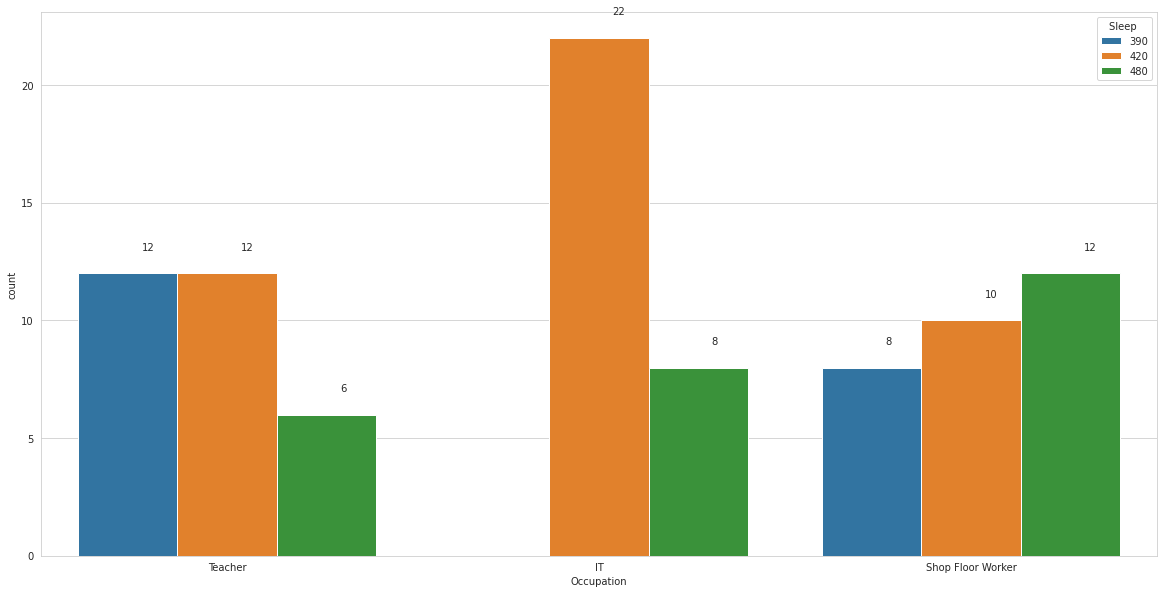

In [ ]:
plt.figure(figsize=(20,10))
ab = sns.countplot(ds['Occupation'],hue=ds['Sleep '], data=ds)
for p in ab.patches:
        ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.17, p.get_height()+1))

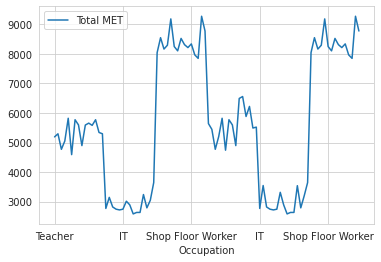

In [ ]:
ds.plot(x='Occupation', y='Total MET')

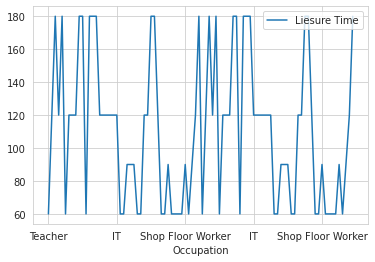

In [ ]:
ds.plot(x='Occupation', y='Liesure Time')

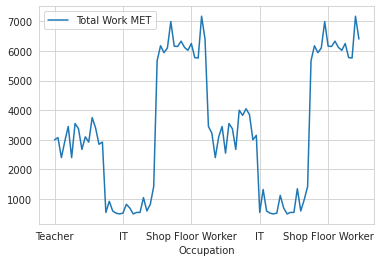

In [ ]:
ds.plot(x='Occupation', y='Total Work MET')

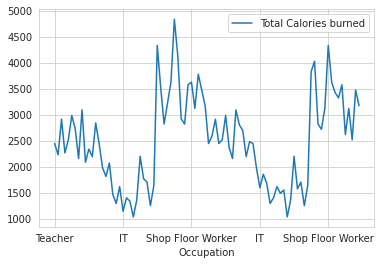

In [ ]:
ds.plot(x='Occupation', y='Total Calories burned')

##Data Pre-Processing

In [ ]:
ds['Medication Y/N'] = ds['Medication Y/N'].apply(lambda x: 0 if x=='N' else 1)
ds['Medication Y/N'].head()

0    0
1    0
2    1
3    0
4    1
Name: Medication Y/N, dtype: int64

## Data analysis of Teacher

In [ ]:
ds1=ds.loc[ds['Occupation']=='Teacher',:]
ds1.reset_index(inplace=True)
ds1

index Occupation  Age Gender  Weight  Vigorous Activity days/week  \
0       0    Teacher   31      F      68                            2   
1       1    Teacher   33      F      62                            3   
2       2    Teacher   46      M      81                            2   
3       3    Teacher   42      F      63                            2   
4       4    Teacher   28      M      70                            3   
5       5    Teacher   37      M      83                            2   
6       6    Teacher   29      M      76                            3   
7       7    Teacher   32      F      60                            3   
8       8    Teacher   50      M      86                            3   
9       9    Teacher   38      F      58                            1   
10     10    Teacher   48      F      65                            1   
11     11    Teacher   32      F      61                            3   
12     12    Teacher   36      M      79                            2   
13     13    Teacher   38      M      68                            2   
14     14    Teacher   29      F      55                            2   
15     45    Teacher   35      F      68                            5   
16     46    Teacher   38      F      72                            4   
17     47    Teacher   45      M      81                            2   
18     48    Teacher   42      M      68                            3   
19     49    Teacher   36      M      70                            3   
20     50    Teacher   37      M      83                            3   
21     51    Teacher   39      M      66                            3   
22     52    Teacher   40      F      60                            3   
23     53    Teacher   52      M      86                            3   
24     54    Teacher   38      M      78                            3   
25     55    Teacher   48      M      75                            4   
26     56    Teacher   42      F      61                            4   
27     57    Teacher   46      F      69                            3   
28     58    Teacher   48      F      68                            3   
29     59    Teacher   39      F      55                            3   

    Vigorous Activity minutes/day  Vigorous Activity minutes/week  \
0                              30                              60   
1                              30                              90   
2                              45                              90   
3                              30                              60   
4                              60                             180   
5                              30                              60   
6                              60                             180   
7                              45                             135   
8                              45                             135   
9                              90                              90   
10                             60                              60   
11                             60                             180   
12                             90                             180   
13                             30                              60   
14                             45                              90   
15                             30                             150   
16                             30                             120   
17                             45                              90   
18                             30                              90   
19                             60                             180   
20                             30                              90   
21                             60                             180   
22                             45                             135   
23                             45                             135   
24             

In [ ]:
X = ds1.iloc[: , 2:-1]
Y = ds1.iloc[: , -1]

In [ ]:
print(X)

    Age Gender  Weight  Vigorous Activity days/week  \
0    31      F      68                            2   
1    33      F      62                            3   
2    46      M      81                            2   
3    42      F      63                            2   
4    28      M      70                            3   
5    37      M      83                            2   
6    29      M      76                            3   
7    32      F      60                            3   
8    50      M      86                            3   
9    38      F      58                            1   
10   48      F      65                            1   
11   32      F      61                            3   
12   36      M      79                            2   
13   38      M      68                            2   
14   29      F      55                            2   
15   35      F      68                            5   
16   38      F      72                            4   
17   45   

In [ ]:
print(Y)

0     2448.0
1     2232.0
2     2916.0
3     2268.0
4     2520.0
5     2988.0
6     2736.0
7     2160.0
8     3096.0
9     2088.0
10    2340.0
11    2196.0
12    2844.0
13    2448.0
14    1980.0
15    2448.0
16    2592.0
17    2916.0
18    2448.0
19    2520.0
20    2988.0
21    2376.0
22    2160.0
23    3096.0
24    2808.0
25    2700.0
26    2196.0
27    2484.0
28    2448.0
29    1980.0
Name: Total Calories burned, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'].astype(str))  
print(X)

    Age  Gender  Weight  Vigorous Activity days/week  \
0    31       0      68                            2   
1    33       0      62                            3   
2    46       1      81                            2   
3    42       0      63                            2   
4    28       1      70                            3   
5    37       1      83                            2   
6    29       1      76                            3   
7    32       0      60                            3   
8    50       1      86                            3   
9    38       0      58                            1   
10   48       0      65                            1   
11   32       0      61                            3   
12   36       1      79                            2   
13   38       1      68                            2   
14   29       0      55                            2   
15   35       0      68                            5   
16   38       0      72                         

###Correlation between different features

In [ ]:
corrdata = X.corr()

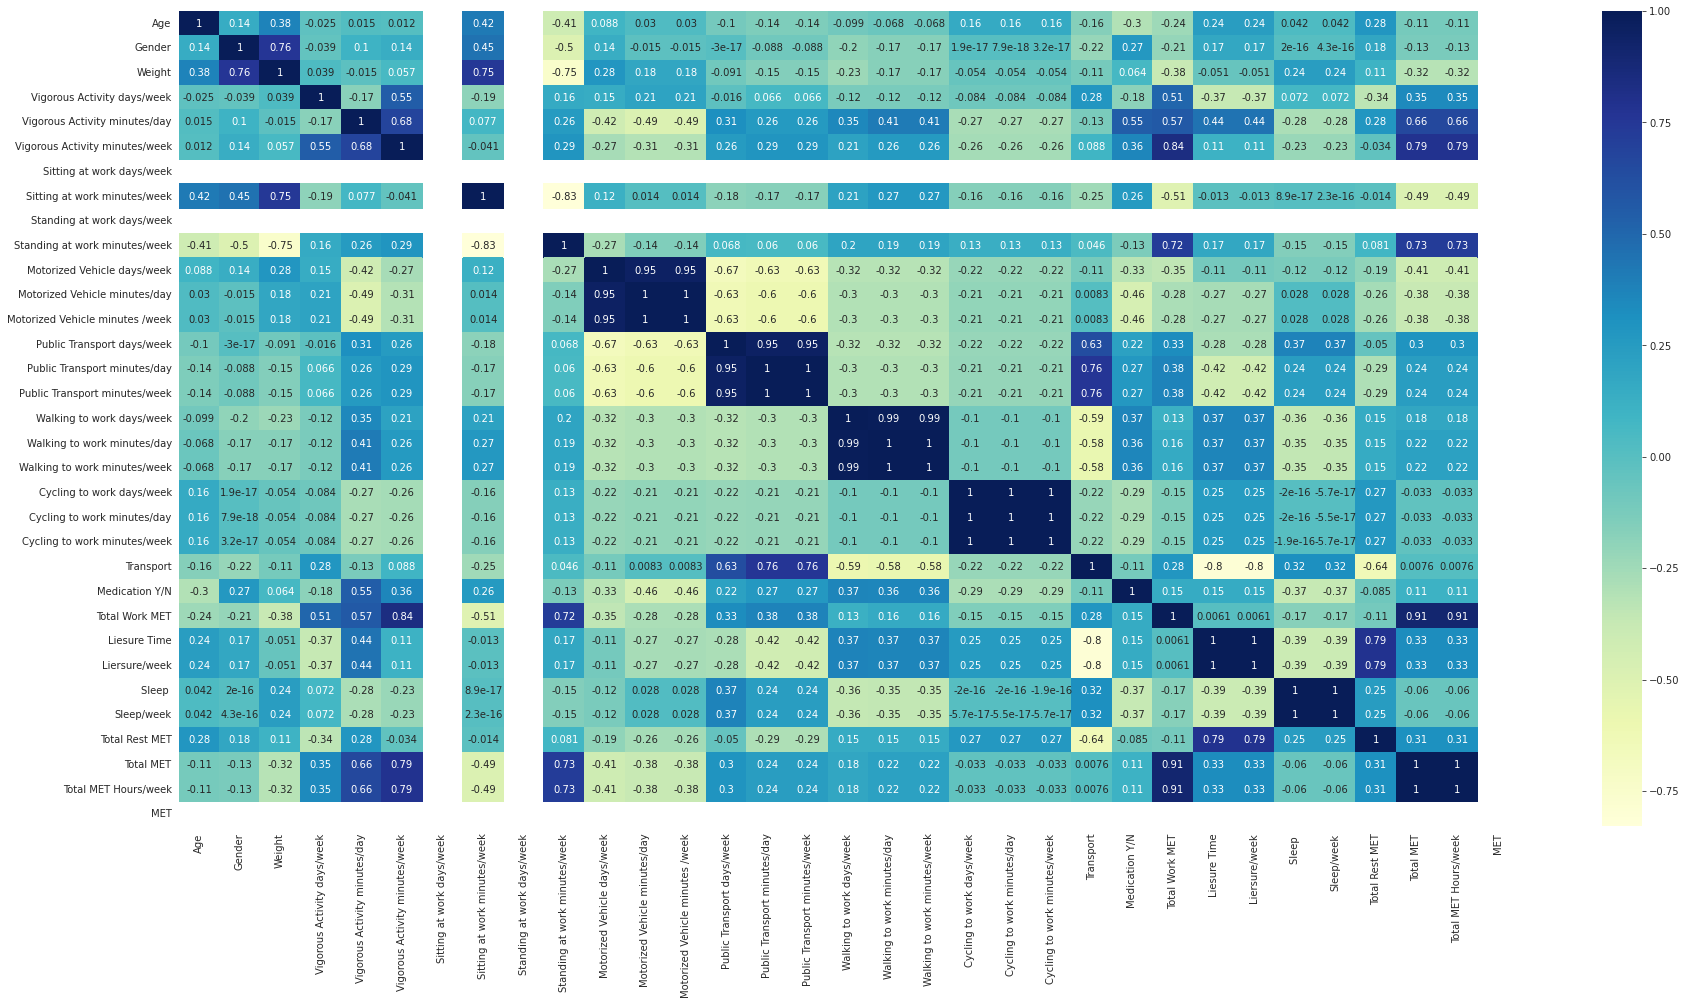

In [ ]:
ax,fig = plt.subplots(figsize=(30,15))
sns.heatmap(corrdata, annot = True, cmap="YlGnBu")

In [ ]:
Y = Y.apply(lambda x:0 if x<=2500 else 1)
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Total Calories burned, dtype: int64

###Feature selection using selectkbest



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X,Y)

In [ ]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X.columns)

In [ ]:
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']
featurescores

column      scores
0                               Age    0.440325
1                            Gender    8.212670
2                            Weight   24.456474
3       Vigorous Activity days/week    0.052391
4     Vigorous Activity minutes/day    4.343891
5    Vigorous Activity minutes/week   35.596918
6         Sitting at work days/week    0.000000
7      Sitting at work minutes/week   64.904207
8        Standing at work days/week    0.000000
9     Standing at work minutes/week   99.109312
10      Motorized Vehicle days/week    5.497738
11    Motorized Vehicle minutes/day    4.599414
12  Motorized Vehicle minutes /week   22.997072
13       Public Transport days/week    0.067873
14     Public Transport minutes/day   10.441654
15    Public Transport minutes/week   52.208272
16        Walking to work days/week    2.737557
17      Walking to work minutes/day    6.212023
18     Walking to work minutes/week   31.060116
19        Cycling to work days/week    7.647059
20      Cycling to work minutes/day   45.882353
21     Cycling to work minutes/week  229.411765
22                        Transport   45.625943
23                   Medication Y/N    1.087104
24                   Total Work MET   80.349888
25                     Liesure Time    8.448230
26                    Liersure/week   42.241150
27                           Sleep     0.290886
28                       Sleep/week    1.454428
29                   Total Rest MET   16.888726
30                        Total MET   17.433744
31             Total MET Hours/week    0.290562
32                              MET    0.000000

In [ ]:
#Top 15 features scores
print(featurescores.nlargest(15,'scores'))

                             column      scores
21     Cycling to work minutes/week  229.411765
9     Standing at work minutes/week   99.109312
24                   Total Work MET   80.349888
7      Sitting at work minutes/week   64.904207
15    Public Transport minutes/week   52.208272
20      Cycling to work minutes/day   45.882353
22                        Transport   45.625943
26                    Liersure/week   42.241150
5    Vigorous Activity minutes/week   35.596918
18     Walking to work minutes/week   31.060116
2                            Weight   24.456474
12  Motorized Vehicle minutes /week   22.997072
30                        Total MET   17.433744
29                   Total Rest MET   16.888726
14     Public Transport minutes/day   10.441654


In [ ]:
#Selecting the best 15 features
X_bestfeat = X[['Cycling to work minutes/week',
                'Standing at work minutes/week',
                'Total Work MET',
                'Sitting at work minutes/week',
                'Public Transport minutes/week',
                'Cycling to work minutes/day',
                'Transport',
                'Liersure/week',
                'Vigorous Activity minutes/week',
                'Walking to work minutes/week',
                'Weight',
                'Motorized Vehicle minutes /week',
                'Total MET',
                'Total Rest MET',
                'Public Transport minutes/day'
                ]]

###Splitting tha dataset into Training and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_bestfeat, Y, test_size = 0.25, stratify=Y, random_state = 1)

###Building Models for different algorithms


####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(random_state = 0)
logi.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score( estimator=logi, 
                             X=X_train ,
                             y=Y_train, 
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy is 70.00 %
Standard Deviation is 40.00 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
Y_pred = logi.predict(X_test)
print(Y_pred)

[0 1 0 1 0 1 1 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
Logi_Regg = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(Logi_Regg*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[2 3]
 [2 1]]
Accuracy is 37.500 %
Precision score is 25.000 %
Recall score is 33.333 %
F1 score is 28.571 %
ROC score is 36.667 %


####K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 5, metric='minkowski', p=2)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score( estimator=knn, 
                             X=X_train ,
                             y=Y_train, 
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 76.67 %
Standard Deviation is 32.66 %


In [ ]:
Y_pred = knn.predict(X_test)
print(Y_pred)

[1 1 1 0 1 0 1 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
KNN = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(KNN*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[3 2]
 [0 3]]
Accuracy is 75.000 %
Precision score is 60.000 %
Recall score is 100.000 %
F1 score is 75.000 %
ROC score is 80.000 %


####SVM

In [ ]:
from sklearn.svm import SVC
lsvm = SVC(kernel='linear', random_state=0, probability=True)
lsvm.fit(X_train,Y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lsvm, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 75.00 %
Standard Deviation is 33.54 %


In [ ]:
Y_pred = lsvm.predict(X_test)
print(Y_pred)

[0 1 0 1 0 1 1 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
LSVM = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(LSVM*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[2 3]
 [2 1]]
Accuracy is 37.500 %
Precision score is 25.000 %
Recall score is 33.333 %
F1 score is 28.571 %
ROC score is 36.667 %


####Kernel SVM

In [ ]:
from sklearn.svm import SVC
ksvm = SVC(kernel='rbf', random_state=0, probability=True)
ksvm.fit(X_train,Y_train)

SVC(probability=True, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=ksvm, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 53.33 %
Standard Deviation is 6.67 %


In [ ]:
Y_pred = ksvm.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
KSVM = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(KSVM*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[5 0]
 [3 0]]
Accuracy is 62.500 %
Precision score is 0.000 %
Recall score is 0.000 %
F1 score is 0.000 %
ROC score is 50.000 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=nb, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 66.67 %
Standard Deviation is 22.36 %


In [ ]:
Y_pred = nb.predict(X_test)
print(Y_pred)

[1 1 0 1 1 1 1 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
NB = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(NB*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[1 4]
 [1 2]]
Accuracy is 37.500 %
Precision score is 33.333 %
Recall score is 66.667 %
F1 score is 44.444 %
ROC score is 43.333 %


####Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier( criterion='entropy', random_state=0)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dtc, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 100.00 %
Standard Deviation is 0.00 %


In [ ]:
Y_pred = dtc.predict(X_test)
print(Y_pred)

[1 1 1 0 0 0 0 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
DTC = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(DTC*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[5 0]
 [0 3]]
Accuracy is 100.000 %
Precision score is 100.000 %
Recall score is 100.000 %
F1 score is 100.000 %
ROC score is 100.000 %


####Randon Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20,
                             criterion='entropy', 
                             random_state=0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rfc, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 95.00 %
Standard Deviation is 15.00 %


In [ ]:
Y_pred = rfc.predict(X_test)
print(Y_pred)

[1 1 1 0 0 0 1 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
RFC = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(RFC*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[4 1]
 [0 3]]
Accuracy is 87.500 %
Precision score is 75.000 %
Recall score is 100.000 %
F1 score is 85.714 %
ROC score is 90.000 %


###Accuracies for all the models

In [ ]:
print('Logistic regression          :',Logi_Regg)
print('K-Nearest Neighbor           :',KNN)
print('SVM                          :',LSVM)
print('Kernel SVM                   :',KSVM)
print('Naive Bayes                  :',NB)
print('Decision Tree Classification :',DTC)
print('Random Forest Classification :',RFC)

Logistic regression          : 0.375
K-Nearest Neighbor           : 0.75
SVM                          : 0.375
Kernel SVM                   : 0.625
Naive Bayes                  : 0.375
Decision Tree Classification : 1.0
Random Forest Classification : 0.875


###ROC Graph

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

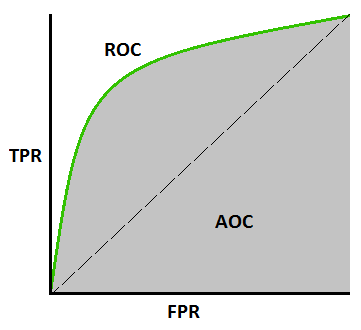

** **
**TPR/Recall/Sensitivity = (TP/(TP+FN))**
** **
**Specificity = (TN/(TN+FP))** 
** ** 
**FPR = 1 - Specificity  = (FP/(TN+FP))**
** **



--> Sensitivity and Specificity are inversely proportional to each other. So when we increase Sensitivity, Specificity decreases, and vice versa.

--> Sensitivity⬆️, Specificity⬇️ and Sensitivity⬇️, Specificity⬆️

--> When we decrease the threshold, we get more positive values thus it increases the sensitivity and decreasing the specificity.

--> Similarly, when we increase the threshold, we get more negative values thus we get higher specificity and lower sensitivity.

--> As we know FPR is 1 - specificity. So when we increase TPR, FPR also increases and vice versa.

--> TPR⬆️, FPR⬆️ and TPR⬇️, FPR⬇️

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


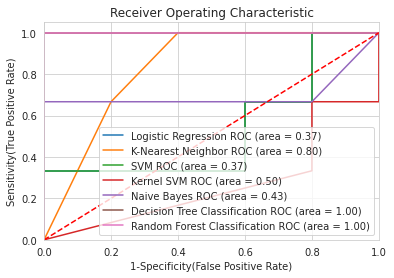

In [ ]:
from sklearn import metrics
plt.figure()
#added all the models implemented above
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0),
},
{
    'label': 'K-Nearest Neighbor',
    'model': KNeighborsClassifier( n_neighbors = 5, metric='minkowski', p=2),
},
{
    'label': 'SVM',
    'model': SVC(kernel='linear', random_state=0, probability=True),
},
{
    'label': 'Kernel SVM',
    'model': SVC(kernel='rbf', random_state=0, probability=True),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'Decision Tree Classification',
    'model': DecisionTreeClassifier( criterion='entropy', random_state=0),
},
{
    'label': 'Random Forest Classification',
    'model': RandomForestClassifier(n_estimators=10,
                             criterion='entropy', 
                             random_state=0),
},
]

# for loop is used to iterate throught the list of models
for m in models:
    model = m['model']
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right") 
plt.show()

## Data analysis of people working in IT

In [ ]:
ds2=ds.loc[ds['Occupation']=='IT',:]
ds2.reset_index(inplace=True)
ds2

index Occupation  Age Gender  Weight  Vigorous Activity days/week  \
0      15         IT   42      M      84                            0   
1      16         IT   27      M      96                            2   
2      17         IT   41      M      68                            0   
3      18         IT   35      F      60                            0   
4      19         IT   38      M      75                            0   
5      20         IT   29      F      53                            0   
6      21         IT   47      M      65                            2   
7      22         IT   44      M      62                            0   
8      23         IT   24      F      48                            0   
9      24         IT   26      F      63                            0   
10     25         IT   40      M     102                            0   
11     26         IT   49      M      82                            3   
12     27         IT   41      M      79                            0   
13     28         IT   36      F      58                            2   
14     29         IT   28      M      76                            4   
15     60         IT   42      M      74                            0   
16     61         IT   38      M      86                            4   
17     62         IT   41      M      78                            0   
18     63         IT   35      F      60                            0   
19     64         IT   38      M      65                            0   
20     65         IT   29      F      75                            0   
21     66         IT   47      M      69                            4   
22     67         IT   44      M      72                            0   
23     68         IT   24      F      48                            0   
24     69         IT   26      F      63                            0   
25     70         IT   40      M     102                            0   
26     71         IT   49      M      73                            5   
27     72         IT   41      M      79                            0   
28     73         IT   36      F      58                            3   
29     74         IT   28      M      76                            4   

    Vigorous Activity minutes/day  Vigorous Activity minutes/week  \
0                               0                               0   
1                              40                              80   
2                               0                               0   
3                               0                               0   
4                               0                               0   
5                               0                               0   
6                              30                              60   
7                               0                               0   
8                               0                               0   
9                               0                               0   
10                              0                               0   
11                             30                              90   
12                              0                               0   
13                             30                              60   
14                             45                             180   
15                              0                               0   
16                             40                             160   
17                              0                               0   
18                              0                               0   
19                              0                               0   
20                              0                               0   
21                             30                             120   
22                              0                               0   
23                              0                               0   
24             

In [ ]:
X = ds2.iloc[: , 2:-1]
Y = ds2.iloc[: , -1]

In [ ]:
print(X)

    Age Gender  Weight  Vigorous Activity days/week  \
0    42      M      84                            0   
1    27      M      96                            2   
2    41      M      68                            0   
3    35      F      60                            0   
4    38      M      75                            0   
5    29      F      53                            0   
6    47      M      65                            2   
7    44      M      62                            0   
8    24      F      48                            0   
9    26      F      63                            0   
10   40      M     102                            0   
11   49      M      82                            3   
12   41      M      79                            0   
13   36      F      58                            2   
14   28      M      76                            4   
15   42      M      74                            0   
16   38      M      86                            4   
17   41   

In [ ]:
print(Y)

0     1814.4
1     2073.6
2     1468.8
3     1296.0
4     1620.0
5     1144.8
6     1404.0
7     1339.2
8     1036.8
9     1360.8
10    2203.2
11    1771.2
12    1706.4
13    1252.8
14    1641.6
15    1598.4
16    1857.6
17    1684.8
18    1296.0
19    1404.0
20    1620.0
21    1490.4
22    1555.2
23    1036.8
24    1360.8
25    2203.2
26    1576.8
27    1706.4
28    1252.8
29    1641.6
Name: Total Calories burned, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'].astype(str))  
print(X)

    Age  Gender  Weight  Vigorous Activity days/week  \
0    42       1      84                            0   
1    27       1      96                            2   
2    41       1      68                            0   
3    35       0      60                            0   
4    38       1      75                            0   
5    29       0      53                            0   
6    47       1      65                            2   
7    44       1      62                            0   
8    24       0      48                            0   
9    26       0      63                            0   
10   40       1     102                            0   
11   49       1      82                            3   
12   41       1      79                            0   
13   36       0      58                            2   
14   28       1      76                            4   
15   42       1      74                            0   
16   38       1      86                         

###Correlation between different features

In [ ]:
corrdata = X.corr()

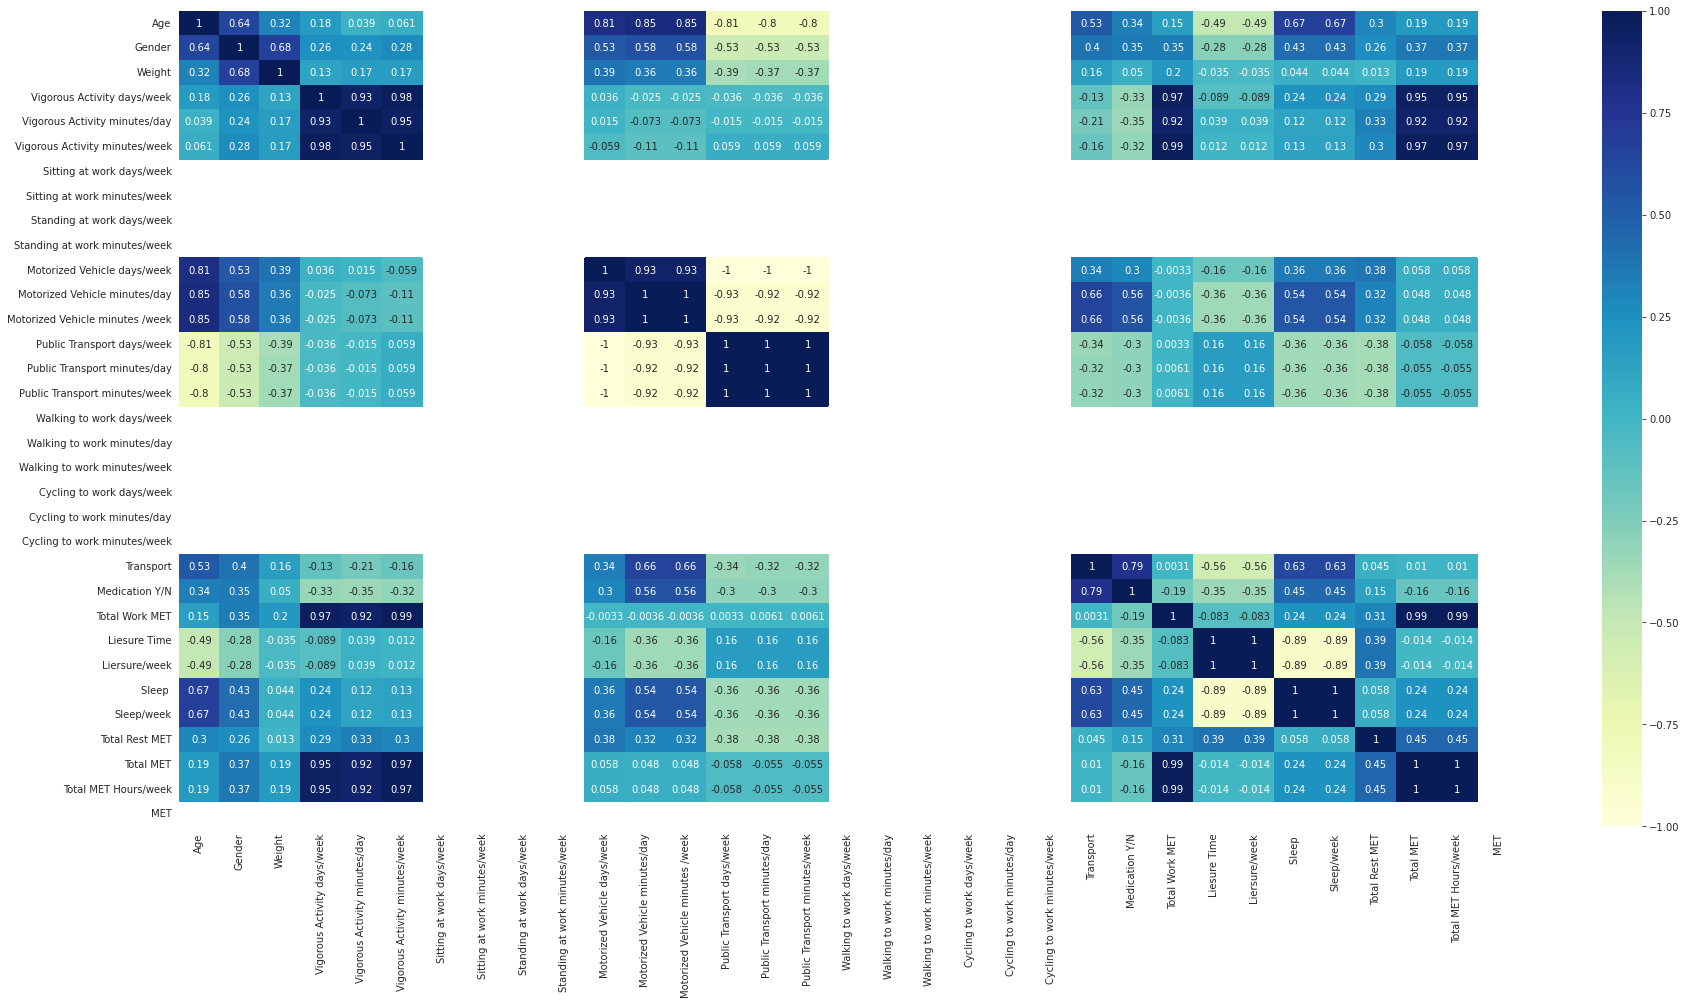

In [ ]:
ax,fig = plt.subplots(figsize=(30,15))
sns.heatmap(corrdata, annot = True, cmap="YlGnBu")

In [ ]:
Y = Y.apply(lambda x:0 if x<=1300 else 1)
Y.head()

0    1
1    1
2    1
3    0
4    1
Name: Total Calories burned, dtype: int64

###Feature selection using selectkbest



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X,Y)

In [ ]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X.columns)

In [ ]:
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']
featurescores

column        scores
0                               Age  7.628931e+00
1                            Gender  6.086957e+00
2                            Weight  3.526427e+01
3       Vigorous Activity days/week  1.234896e+00
4     Vigorous Activity minutes/day  7.497782e+00
5    Vigorous Activity minutes/week  7.228380e+01
6         Sitting at work days/week  1.756073e-30
7      Sitting at work minutes/week  0.000000e+00
8        Standing at work days/week  1.756073e-30
9     Standing at work minutes/week  0.000000e+00
10      Motorized Vehicle days/week  1.631846e+00
11    Motorized Vehicle minutes/day  3.961448e+01
12  Motorized Vehicle minutes /week  1.980724e+02
13       Public Transport days/week  4.487578e+00
14     Public Transport minutes/day  2.610248e+01
15    Public Transport minutes/week  1.305124e+02
16        Walking to work days/week           NaN
17      Walking to work minutes/day           NaN
18     Walking to work minutes/week           NaN
19        Cycling to work days/week           NaN
20      Cycling to work minutes/day           NaN
21     Cycling to work minutes/week           NaN
22                        Transport  4.536000e+01
23                   Medication Y/N  1.826087e+00
24                   Total Work MET  1.855912e+02
25                     Liesure Time  1.680061e+01
26                    Liersure/week  8.400304e+01
27                           Sleep   5.360989e+00
28                       Sleep/week  2.680495e+01
29                   Total Rest MET  5.329960e-02
30                        Total MET  5.012863e+01
31             Total MET Hours/week  8.354773e-01
32                              MET  0.000000e+00

In [ ]:
#Top 15 features scores
print(featurescores.nlargest(15,'scores'))

                             column      scores
12  Motorized Vehicle minutes /week  198.072392
24                   Total Work MET  185.591169
15    Public Transport minutes/week  130.512422
26                    Liersure/week   84.003042
5    Vigorous Activity minutes/week   72.283803
30                        Total MET   50.128635
22                        Transport   45.360003
11    Motorized Vehicle minutes/day   39.614478
2                            Weight   35.264269
28                       Sleep/week   26.804946
14     Public Transport minutes/day   26.102484
25                     Liesure Time   16.800608
0                               Age    7.628931
4     Vigorous Activity minutes/day    7.497782
1                            Gender    6.086957


In [ ]:
#Selecting the best 15 features
X_bestfeat = X[['Total Work MET',
                'Public Transport minutes/week',
                'Vigorous Activity minutes/week',
                'Motorized Vehicle minutes /week',
                'Total MET',
                'Weight',
                'Public Transport minutes/day',
                'Motorized Vehicle minutes/day',
                'Vigorous Activity minutes/day',
                'Transport',
                'Public Transport days/week',
                'Gender',
                'Sleep/week',
                'Age',
                'Vigorous Activity days/week'
                ]]

###Splitting tha dataset into Training and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_bestfeat, Y, test_size = 0.25, stratify=Y, random_state = 1)

###Building Models for different algorithms


####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(random_state = 0)
logi.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score( estimator=logi, 
                             X=X_train ,
                             y=Y_train, 
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

Accuracy is 91.67 %
Standard Deviation is 17.08 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
Y_pred = logi.predict(X_test)
print(Y_pred)

[1 1 1 1 0 1 1 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
Logi_Regg = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(Logi_Regg*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[2 0]
 [0 6]]
Accuracy is 100.000 %
Precision score is 100.000 %
Recall score is 100.000 %
F1 score is 100.000 %
ROC score is 100.000 %


####K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 5, metric='minkowski', p=2)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score( estimator=knn, 
                             X=X_train ,
                             y=Y_train, 
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Accuracy is 78.33 %
Standard Deviation is 22.42 %


In [ ]:
Y_pred = knn.predict(X_test)
print(Y_pred)

[1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
KNN = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(KNN*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[0 2]
 [0 6]]
Accuracy is 75.000 %
Precision score is 75.000 %
Recall score is 100.000 %
F1 score is 85.714 %
ROC score is 50.000 %


####SVM


In [ ]:
from sklearn.svm import SVC
lsvm = SVC(kernel='linear', random_state=0, probability=True)
lsvm.fit(X_train,Y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lsvm, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Accuracy is 91.67 %
Standard Deviation is 17.08 %


In [ ]:
Y_pred = lsvm.predict(X_test)
print(Y_pred)

[1 1 0 1 0 1 1 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
LSVM = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(LSVM*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[2 0]
 [1 5]]
Accuracy is 87.500 %
Precision score is 100.000 %
Recall score is 83.333 %
F1 score is 90.909 %
ROC score is 91.667 %


####Kernel SVM

In [ ]:
from sklearn.svm import SVC
ksvm = SVC(kernel='rbf', random_state=0, probability=True)
ksvm.fit(X_train,Y_train)

SVC(probability=True, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=ksvm, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Accuracy is 78.33 %
Standard Deviation is 22.42 %


In [ ]:
Y_pred = ksvm.predict(X_test)
print(Y_pred)

[1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
KSVM = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(KSVM*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[0 2]
 [0 6]]
Accuracy is 75.000 %
Precision score is 75.000 %
Recall score is 100.000 %
F1 score is 85.714 %
ROC score is 50.000 %


####Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=nb, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.00 %
Standard Deviation is 24.49 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


In [ ]:
Y_pred = nb.predict(X_test)
print(Y_pred)

[1 1 1 1 0 1 0 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
NB = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(NB*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[2 0]
 [1 5]]
Accuracy is 87.500 %
Precision score is 100.000 %
Recall score is 83.333 %
F1 score is 90.909 %
ROC score is 91.667 %


####Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier( criterion='entropy', random_state=0)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dtc, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 100.00 %
Standard Deviation is 0.00 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


In [ ]:
Y_pred = dtc.predict(X_test)
print(Y_pred)

[1 1 1 1 0 1 1 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
DTC = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(DTC*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[2 0]
 [0 6]]
Accuracy is 100.000 %
Precision score is 100.000 %
Recall score is 100.000 %
F1 score is 100.000 %
ROC score is 100.000 %


####Randon Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20,
                             criterion='entropy', 
                             random_state=0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rfc, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Accuracy is 100.00 %
Standard Deviation is 0.00 %


In [ ]:
Y_pred = rfc.predict(X_test)
print(Y_pred)

[1 1 1 1 0 1 0 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
RFC = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(RFC*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[2 0]
 [1 5]]
Accuracy is 87.500 %
Precision score is 100.000 %
Recall score is 83.333 %
F1 score is 90.909 %
ROC score is 91.667 %


###Accuracies for all the models

In [ ]:
print('Logistic regression          :',Logi_Regg)
print('K-Nearest Neighbor           :',KNN)
print('SVM                          :',LSVM)
print('Kernel SVM                   :',KSVM)
print('Naive Bayes                  :',NB)
print('Decision Tree Classification :',DTC)
print('Random Forest Classification :',RFC)

Logistic regression          : 1.0
K-Nearest Neighbor           : 0.75
SVM                          : 0.875
Kernel SVM                   : 0.75
Naive Bayes                  : 0.875
Decision Tree Classification : 1.0
Random Forest Classification : 0.875


###ROC Graph

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


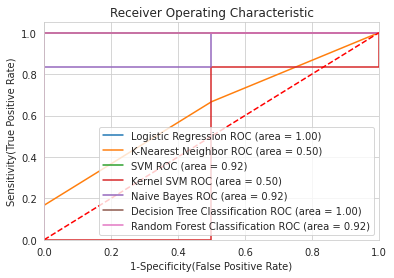

In [ ]:
from sklearn import metrics
plt.figure()
#added all the models implemented above
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0),
},
{
    'label': 'K-Nearest Neighbor',
    'model': KNeighborsClassifier( n_neighbors = 5, metric='minkowski', p=2),
},
{
    'label': 'SVM',
    'model': SVC(kernel='linear', random_state=0, probability=True),
},
{
    'label': 'Kernel SVM',
    'model': SVC(kernel='rbf', random_state=0, probability=True),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'Decision Tree Classification',
    'model': DecisionTreeClassifier( criterion='entropy', random_state=0),
},
{
    'label': 'Random Forest Classification',
    'model': RandomForestClassifier(n_estimators=10,
                             criterion='entropy', 
                             random_state=0),
},
]

# for loop is used to iterate throught the list of models
for m in models:
    model = m['model']
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right") 
plt.show()

## Data analysis of people working as Shop Floor Worker

In [ ]:
ds3=ds.loc[ds['Occupation']=='Shop Floor Worker',:]
ds3.reset_index(inplace=True)
ds3

index         Occupation  Age Gender  Weight  Vigorous Activity days/week  \
0      30  Shop Floor Worker   42      M      86                            0   
1      31  Shop Floor Worker   23      M      70                            2   
2      32  Shop Floor Worker   24      M      56                            0   
3      33  Shop Floor Worker   28      M      64                            2   
4      34  Shop Floor Worker   31      M      72                            4   
5      35  Shop Floor Worker   56      M      96                            2   
6      36  Shop Floor Worker   43      M      82                            2   
7      37  Shop Floor Worker   27      M      58                            1   
8      38  Shop Floor Worker   29      M      56                            1   
9      39  Shop Floor Worker   21      M      71                            1   
10     40  Shop Floor Worker   19      M      72                            2   
11     41  Shop Floor Worker   30      M      62                            0   
12     42  Shop Floor Worker   34      M      75                            0   
13     43  Shop Floor Worker   32      M      69                            2   
14     44  Shop Floor Worker   22      M      63                            2   
15     75  Shop Floor Worker   44      M      76                            0   
16     76  Shop Floor Worker   33      M      80                            2   
17     77  Shop Floor Worker   42      M      56                            0   
18     78  Shop Floor Worker   38      M      54                            2   
19     79  Shop Floor Worker   31      M      62                            4   
20     80  Shop Floor Worker   36      M      86                            2   
21     81  Shop Floor Worker   43      M      72                            2   
22     82  Shop Floor Worker   37      M      68                            1   
23     83  Shop Floor Worker   29      M      66                            1   
24     84  Shop Floor Worker   21      M      71                            1   
25     85  Shop Floor Worker   24      M      52                            2   
26     86  Shop Floor Worker   31      M      62                            0   
27     87  Shop Floor Worker   29      M      50                            0   
28     88  Shop Floor Worker   33      M      69                            2   
29     89  Shop Floor Worker   32      M      63                            2   

    Vigorous Activity minutes/day  Vigorous Activity minutes/week  \
0                               0                               0   
1                              40                              80   
2                               0                               0   
3                              30                              60   
4                              60                             240   
5                              25                              50   
6                              30                              60   
7                              90                              90   
8                              60                              60   
9                              40                              40   
10                             45                              90   
11                              0                               0   
12                              0                               0   
13                            120                             240   
14                             60                             120   
15                              0                               0   
16                             40                              80   
17                              0                               0   
18                             30                              60   
19                             60                             240   
20                             25          

In [ ]:
X = ds3.iloc[: , 2:-1]
Y = ds3.iloc[: , -1]

In [ ]:
print(X)

    Age Gender  Weight  Vigorous Activity days/week  \
0    42      M      86                            0   
1    23      M      70                            2   
2    24      M      56                            0   
3    28      M      64                            2   
4    31      M      72                            4   
5    56      M      96                            2   
6    43      M      82                            2   
7    27      M      58                            1   
8    29      M      56                            1   
9    21      M      71                            1   
10   19      M      72                            2   
11   30      M      62                            0   
12   34      M      75                            0   
13   32      M      69                            2   
14   22      M      63                            2   
15   44      M      76                            0   
16   33      M      80                            2   
17   42   

In [ ]:
print(Y)

0     4334.4
1     3528.0
2     2822.4
3     3225.6
4     3628.8
5     4838.4
6     4132.8
7     2923.2
8     2822.4
9     3578.4
10    3628.8
11    3124.8
12    3780.0
13    3477.6
14    3175.2
15    3830.4
16    4032.0
17    2822.4
18    2721.6
19    3124.8
20    4334.4
21    3628.8
22    3427.2
23    3326.4
24    3578.4
25    2620.8
26    3124.8
27    2520.0
28    3477.6
29    3175.2
Name: Total Calories burned, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'].astype(str))  
print(X)

    Age  Gender  Weight  Vigorous Activity days/week  \
0    42       0      86                            0   
1    23       0      70                            2   
2    24       0      56                            0   
3    28       0      64                            2   
4    31       0      72                            4   
5    56       0      96                            2   
6    43       0      82                            2   
7    27       0      58                            1   
8    29       0      56                            1   
9    21       0      71                            1   
10   19       0      72                            2   
11   30       0      62                            0   
12   34       0      75                            0   
13   32       0      69                            2   
14   22       0      63                            2   
15   44       0      76                            0   
16   33       0      80                         

###Correlation between different features

In [ ]:
corrdata = X.corr()

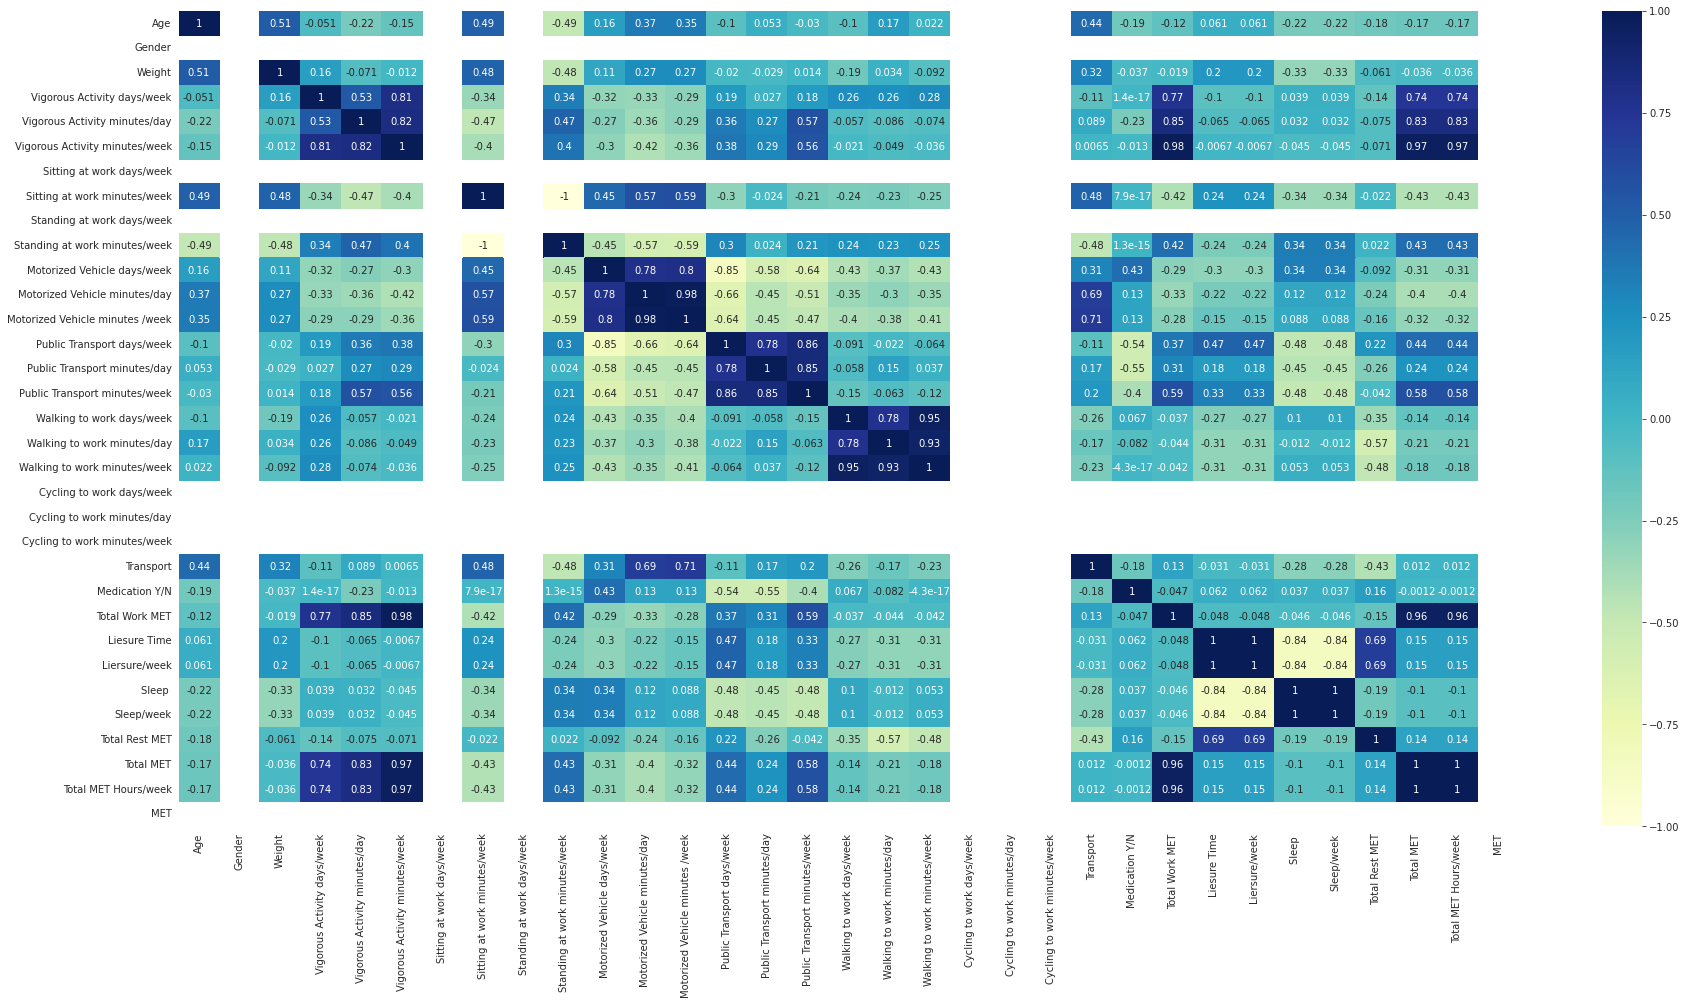

In [ ]:
ax,fig = plt.subplots(figsize=(30,15))
sns.heatmap(corrdata, annot = True, cmap="YlGnBu")

In [ ]:
Y = Y.apply(lambda x:0 if x<=3400 else 1)
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: Total Calories burned, dtype: int64

###Feature selection using selectkbest



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X,Y)

In [ ]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X.columns)

In [ ]:
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']
featurescores

column      scores
0                               Age    4.780379
1                            Gender         NaN
2                            Weight   32.049753
3       Vigorous Activity days/week    0.646684
4     Vigorous Activity minutes/day   14.146205
5    Vigorous Activity minutes/week   42.528445
6         Sitting at work days/week    0.000000
7      Sitting at work minutes/week   11.834416
8        Standing at work days/week    0.000000
9     Standing at work minutes/week    0.688776
10      Motorized Vehicle days/week    0.214286
11    Motorized Vehicle minutes/day    2.150298
12  Motorized Vehicle minutes /week   23.412765
13       Public Transport days/week    0.164062
14     Public Transport minutes/day   10.803571
15    Public Transport minutes/week  123.783293
16        Walking to work days/week    1.428571
17      Walking to work minutes/day    5.401786
18     Walking to work minutes/week    2.142857
19        Cycling to work days/week         NaN
20      Cycling to work minutes/day         NaN
21     Cycling to work minutes/week         NaN
22                        Transport   81.432050
23                   Medication Y/N    0.178571
24                   Total Work MET   14.147826
25                     Liesure Time   17.142857
26                    Liersure/week   85.714286
27                           Sleep    11.800459
28                       Sleep/week   59.002294
29                   Total Rest MET    4.805492
30                        Total MET    4.475011
31             Total MET Hours/week    0.074584
32                              MET    0.000000

In [ ]:
#Top 15 features scores
print(featurescores.nlargest(15,'scores'))

                             column      scores
15    Public Transport minutes/week  123.783293
26                    Liersure/week   85.714286
22                        Transport   81.432050
28                       Sleep/week   59.002294
5    Vigorous Activity minutes/week   42.528445
2                            Weight   32.049753
12  Motorized Vehicle minutes /week   23.412765
25                     Liesure Time   17.142857
24                   Total Work MET   14.147826
4     Vigorous Activity minutes/day   14.146205
7      Sitting at work minutes/week   11.834416
27                           Sleep    11.800459
14     Public Transport minutes/day   10.803571
17      Walking to work minutes/day    5.401786
29                   Total Rest MET    4.805492


In [ ]:
#Selecting the best 15 features
X_bestfeat = X[['Public Transport minutes/week',
                'Liersure/week',
                'Transport',
                'Sleep/week',
                'Vigorous Activity minutes/week',
                'Weight',
                'Motorized Vehicle minutes /week',
                'Liesure Time',
                'Total Work MET',
                'Vigorous Activity minutes/day',
                'Sitting at work minutes/week',
                'Public Transport minutes/day',
                'Walking to work minutes/day',
                'Total Rest MET'
                ]]

###Splitting tha dataset into Training and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_bestfeat, Y, test_size = 0.25, stratify=Y, random_state = 1)

###Building Models for different algorithms


####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(random_state = 0)
logi.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score( estimator=logi, 
                             X=X_train ,
                             y=Y_train, 
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy is 73.33 %
Standard Deviation is 31.80 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
Y_pred = logi.predict(X_test)
print(Y_pred)

[0 1 0 1 0 1 0 1]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
Logi_Regg = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(Logi_Regg*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[2 2]
 [2 2]]
Accuracy is 50.000 %
Precision score is 50.000 %
Recall score is 50.000 %
F1 score is 50.000 %
ROC score is 50.000 %


####K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 5, metric='minkowski', p=2)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score( estimator=knn, 
                             X=X_train ,
                             y=Y_train, 
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 73.33 %
Standard Deviation is 31.80 %


In [ ]:
Y_pred = knn.predict(X_test)
print(Y_pred)

[0 0 0 0 0 1 1 1]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
KNN = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(KNN*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[2 2]
 [3 1]]
Accuracy is 37.500 %
Precision score is 33.333 %
Recall score is 25.000 %
F1 score is 28.571 %
ROC score is 37.500 %


####SVM


In [ ]:
from sklearn.svm import SVC
lsvm = SVC(kernel='linear', random_state=0, probability=True)
lsvm.fit(X_train,Y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lsvm, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 81.67 %
Standard Deviation is 22.91 %


In [ ]:
Y_pred = lsvm.predict(X_test)
print(Y_pred)

[1 1 1 1 0 0 0 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
LSVM = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(LSVM*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[3 1]
 [1 3]]
Accuracy is 75.000 %
Precision score is 75.000 %
Recall score is 75.000 %
F1 score is 75.000 %
ROC score is 75.000 %


####Kernel SVM

In [ ]:
from sklearn.svm import SVC
ksvm = SVC(kernel='rbf', random_state=0, probability=True)
ksvm.fit(X_train,Y_train)

SVC(probability=True, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=ksvm, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 53.33 %
Standard Deviation is 6.67 %


In [ ]:
Y_pred = ksvm.predict(X_test)
print(Y_pred)

[1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
KSVM = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(KSVM*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[0 4]
 [0 4]]
Accuracy is 50.000 %
Precision score is 50.000 %
Recall score is 100.000 %
F1 score is 66.667 %
ROC score is 50.000 %


####Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=nb, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 73.33 %
Standard Deviation is 31.80 %


In [ ]:
Y_pred = nb.predict(X_test)
print(Y_pred)

[0 1 0 0 0 1 1 1]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
NB = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(NB*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[2 2]
 [2 2]]
Accuracy is 50.000 %
Precision score is 50.000 %
Recall score is 50.000 %
F1 score is 50.000 %
ROC score is 50.000 %


####Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier( criterion='entropy', random_state=0)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dtc, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 100.00 %
Standard Deviation is 0.00 %


In [ ]:
Y_pred = dtc.predict(X_test)
print(Y_pred)

[1 1 1 0 0 1 0 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
DTC = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(DTC*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[4 0]
 [0 4]]
Accuracy is 100.000 %
Precision score is 100.000 %
Recall score is 100.000 %
F1 score is 100.000 %
ROC score is 100.000 %


####Randon Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20,
                             criterion='entropy', 
                             random_state=0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rfc, 
                             X=X_train ,
                             y=Y_train,
                             cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 91.67 %
Standard Deviation is 17.08 %


In [ ]:
Y_pred = rfc.predict(X_test)
print(Y_pred)

[0 1 0 0 0 1 0 0]


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
cm = confusion_matrix(Y_test , Y_pred)
print("Confusion Matrix is :",cm)
RFC = accuracy_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
prec = precision_score(Y_test , Y_pred)
rec = recall_score(Y_test , Y_pred)
roc = roc_auc_score(Y_test , Y_pred)
print("Accuracy is {:.3f} %".format(RFC*100))
print("Precision score is {:.3f} %".format(prec*100))
print("Recall score is {:.3f} %".format(rec*100))
print("F1 score is {:.3f} %".format(f1*100))
print("ROC score is {:.3f} %".format(roc*100))

Confusion Matrix is : [[4 0]
 [2 2]]
Accuracy is 75.000 %
Precision score is 100.000 %
Recall score is 50.000 %
F1 score is 66.667 %
ROC score is 75.000 %


###Accuracies for all the models

In [ ]:
print('Logistic regression          :',Logi_Regg)
print('K-Nearest Neighbor           :',KNN)
print('SVM                          :',LSVM)
print('Kernel SVM                   :',KSVM)
print('Naive Bayes                  :',NB)
print('Decision Tree Classification :',DTC)
print('Random Forest Classification :',RFC)

Logistic regression          : 0.5
K-Nearest Neighbor           : 0.375
SVM                          : 0.75
Kernel SVM                   : 0.5
Naive Bayes                  : 0.5
Decision Tree Classification : 1.0
Random Forest Classification : 0.75


###ROC Graph

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


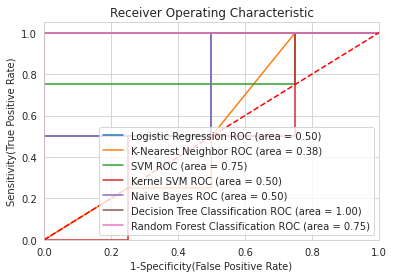

In [ ]:
from sklearn import metrics
plt.figure()
#added all the models implemented above
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0),
},
{
    'label': 'K-Nearest Neighbor',
    'model': KNeighborsClassifier( n_neighbors = 5, metric='minkowski', p=2),
},
{
    'label': 'SVM',
    'model': SVC(kernel='linear', random_state=0, probability=True),
},
{
    'label': 'Kernel SVM',
    'model': SVC(kernel='rbf', random_state=0, probability=True),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'Decision Tree Classification',
    'model': DecisionTreeClassifier( criterion='entropy', random_state=0),
},
{
    'label': 'Random Forest Classification',
    'model': RandomForestClassifier(n_estimators=10,
                             criterion='entropy', 
                             random_state=0),
},
]

# for loop is used to iterate throught the list of models
for m in models:
    model = m['model']
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right") 
plt.show()